# Data analysis project(zomato sales)

## importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## loading data frame

In [9]:
dataframe=pd.read_csv("Zomato-data-.csv")
print (dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


## Data cleaning

In [10]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


## Getting the info of the table

In [12]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Checking null values

In [14]:
dataframe.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

# Exlopring the data

## Types of restaurants

Text(0.5, 0, 'Type of restraunts')

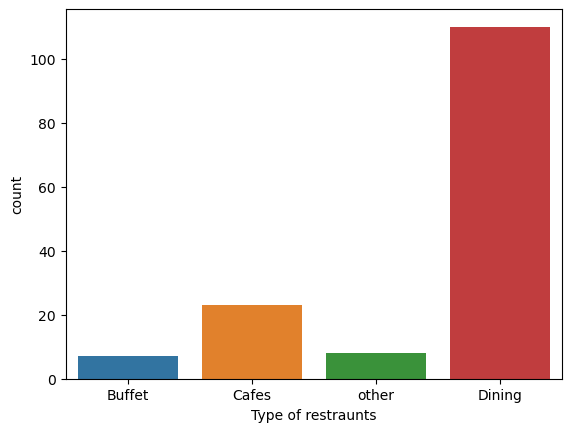

In [20]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel('Type of restraunts')

## Votes by restaurant type

Text(0, 0.5, 'votes')

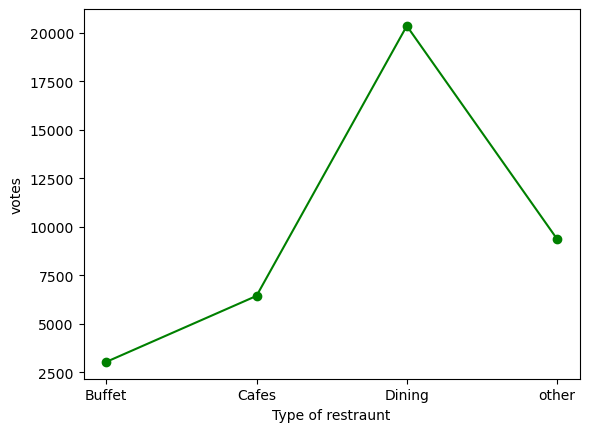

In [26]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel('Type of restraunt')
plt.ylabel('votes')


## Find the restaurant with the highest number of votes

In [33]:
max_votes=dataframe['votes'].max()
restraunt_with_max_votes=dataframe.loc[dataframe['votes']==max_votes,'name']
print('restraunt_with_max_votes:',restraunt_with_max_votes)

restraunt_with_max_votes: 38    Empire Restaurant
Name: name, dtype: object


## Online order availability

<Axes: xlabel='online_order', ylabel='count'>

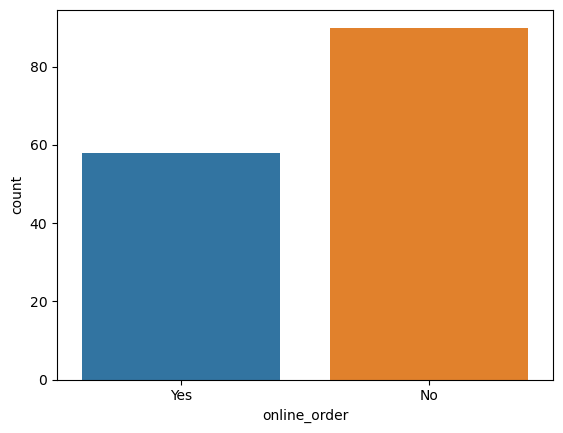

In [35]:
sns.countplot(x=dataframe['online_order'])

## Checking the distribution of ratings from the rate column

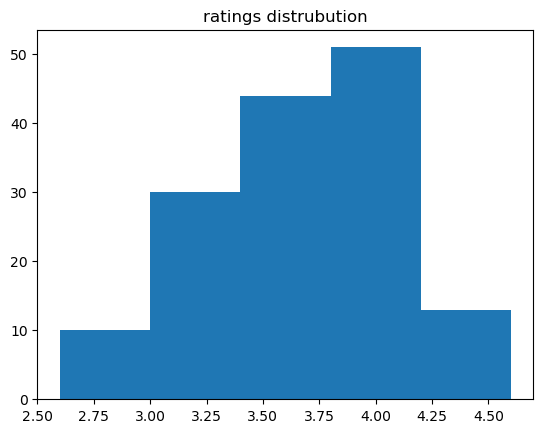

In [39]:
plt.hist(dataframe['rate'],bins=5)
plt.title('ratings distrubution')
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

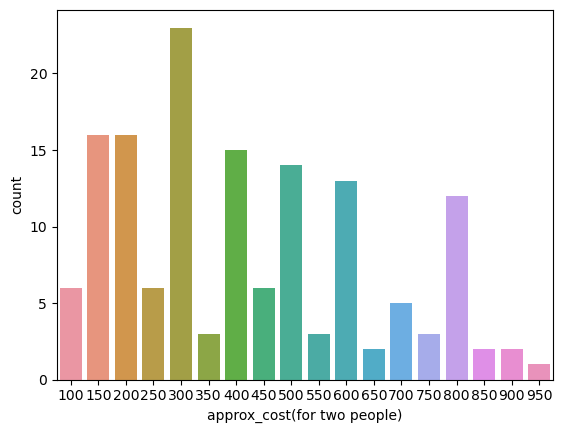

In [42]:
couple_data=dataframe['approx_cost(for two people)']

sns.countplot(x=couple_data)

## Ratings Comparison - Online vs Offline Orders

<Axes: xlabel='online_order', ylabel='rate'>

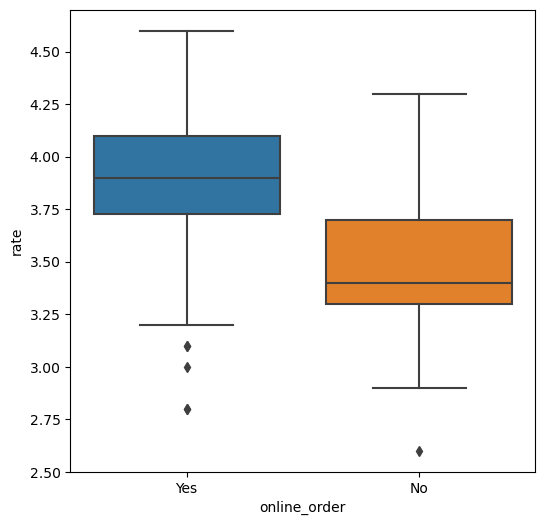

In [48]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe)

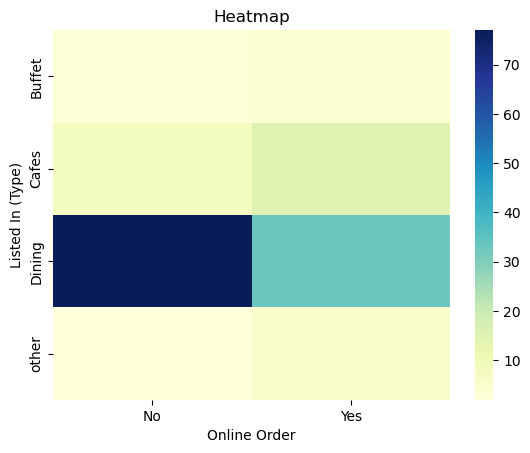

In [60]:
pivot_table=dataframe.pivot_table(index='listed_in(type)'),columns='online order'
sns.heatmap=pivot
